In [1]:
import pandas as pd

c = pd.read_csv("https://raw.githubusercontent.com/blakocha/ADRPY2025/refs/heads/main/cointosses.csv").dropna()
display(c)

,Unnamed: 0,toss,fake,pierwszy_O,liczba_serii,liczba_O,max_seria,runtest_z,sd10,sum_2max,sum_3max,sum_4max,sum_5max,sum_6max,sum_7max,count_1
0,1,ORRROROOROOOORORROROORRRORORORORROROORRORRROOR...,1,1,60,49,5,1.713364,0.073786,10,14,18,21,24,27,36
1,2,OORORRRROORROROOROROROOOOORRRRORORROOORROORROR...,1,1,52,50,5,0.100509,0.000000,10,15,19,23,27,31,28
2,3,RROOROOOORORORORRROOORROOROROROOOORRORORORRROR...,1,0,56,51,4,0.908968,0.073786,8,11,14,17,20,23,26
3,4,OORRROOORRRORROOROOOORRROROROORORROOORRRRROOOO...,1,1,50,48,5,-0.084564,0.063246,10,14,18,21,24,27,21
4,5,OROROORROROOORRROORRORRROROOROORROORROOOOORORR...,1,1,60,48,5,1.727525,0.091894,9,12,15,18,21,24,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,522,RORROOOORROOROOROROOOROOOOOOORRROOORRRRRROOOOR...,0,0,47,55,7,-0.609208,0.164992,13,18,22,26,30,34,24
520,523,ORORROROROOOORRRRORROOOOOOORROORRRORRRRROOOOOR...,0,1,55,50,7,0.703562,0.149071,12,17,21,25,28,31,31
521,524,RRROOORRRRORROORRRORROOOOOOOROOOOORRRRORROOORR...,0,0,42,42,7,-1.489879,0.175119,13,18,23,27,31,35,19
522,525,RORROROOOROOOORRRRRORRRORRRORORRROORRRRROOOROR...,0,0,48,44,8,-0.363094,0.134990,14,19,24,28,32,36,27


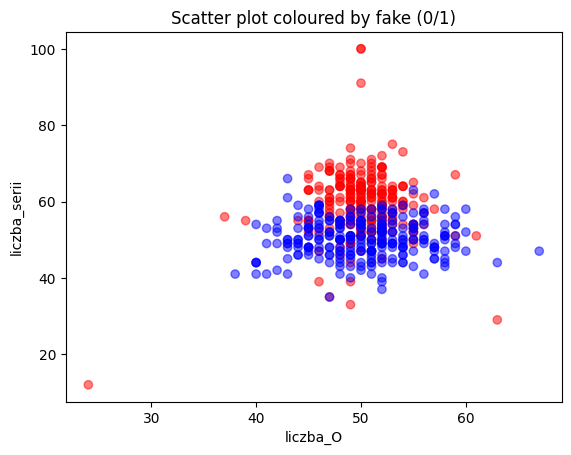

In [14]:
# Scatter plot: x - liczba_O, y - liczba_serii, colour - fake (0/1)
import matplotlib.pyplot as plt
plt.scatter(
    c['liczba_O'],
    c['liczba_serii'],
    c = c['fake'].map({0: 'blue', 1: 'red'}), 
    alpha = 0.5
)

plt.xlabel('liczba_O')
plt.ylabel('liczba_serii')
plt.title('Scatter plot coloured by fake (0/1)')

plt.show()

In [3]:
X = c.drop(columns=["fake", "toss", "Unnamed: 0"])
y = c["fake"]
print(X)

     pierwszy_O  liczba_serii  liczba_O  max_seria  runtest_z      sd10  \
0             1            60        49          5   1.713364  0.073786   
1             1            52        50          5   0.100509  0.000000   
2             0            56        51          4   0.908968  0.073786   
3             1            50        48          5  -0.084564  0.063246   
4             1            60        48          5   1.727525  0.091894   
..          ...           ...       ...        ...        ...       ...   
519           0            47        55          7  -0.609208  0.164992   
520           1            55        50          7   0.703562  0.149071   
521           0            42        42          7  -1.489879  0.175119   
522           0            48        44          8  -0.363094  0.134990   
523           1            51        47          6   0.000000  0.216282   

     sum_2max  sum_3max  sum_4max  sum_5max  sum_6max  sum_7max  count_1  
0          10        14 

In [9]:
# Train / validation split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=120/524, random_state=42, stratify=y
)

print(y.mean())
print(y_train.mean())
print(y_valid.mean())

0.5
0.5
0.5


In [6]:
from sklearn.preprocessing import StandardScaler

# z-score-standardization: z = (x-mean)/sd
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)